# Credit Scoring  

###### Anton Titarenko

Сперва, загрузим данные и ознакомимся, с каким набором переменных мы имеем дело. По мере надобности будем подключать разнообразные пакеты для обработки, визуализации, анализа данных и построения моделей. 

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use('ggplot')
pd.options.display.max_rows = 4000

Собственно, загружаем тренировочную выборку и узнаем размерность матрицы переменных.

In [127]:
df = pd.read_csv('Train_Sample.csv', delimiter=';')
print('Training data shape: ', df.shape)

Training data shape:  (65974, 223)


Удалим Id колонку за ненадобностью: при необходимости мы сможем воспользоваться встроенным индексом датафрейма. 
Выведем на экран несколько строк таблицы чтобы получить визуальную оценку данных.

In [128]:
df = df.drop(columns=['Id'])
df.head()

,par1,par2,par3,par4,par5,par6,par7,par8,par9,par10,...,par215,par216,par217,par218,par219,par220,par221,par222,par223,Status
0,10,1.111111,10,0,1249,2686.375,1.625,16213,6.00,3.20,...,11.333333,9,0,0,0.000000,0,426,4647.333333,69,0
1,10,0.000000,0,0,2974,15810.750,1.500,15487,11.50,3.20,...,30.000000,1,0,0,0.000000,0,2547,12022.250000,29,0
2,40,0.647059,22,8,5801,8175.375,1.625,72254,2.75,1.00,...,7.636364,11,1050,16,688.833333,8266,425,12705.176470,181,0
3,16,2.076923,27,2,8761,8818.400,1.400,23754,4.50,3.25,...,24.125000,8,2000,14,1636.944444,117860,2135,12814.533330,71,0
4,10,0.454545,5,1,5958,9778.000,1.000,5958,4.00,1.50,...,28.000000,1,0,0,0.000000,0,857,10088.909090,45,0


Итак, наши данные насчитывают 65974 наблюдения и 222 признака, включающие независимые переменные parX и целевую переменную Status.

## Exploratory Data Analysis (EDA) 

Исследуем распределение целевой переменной Status.

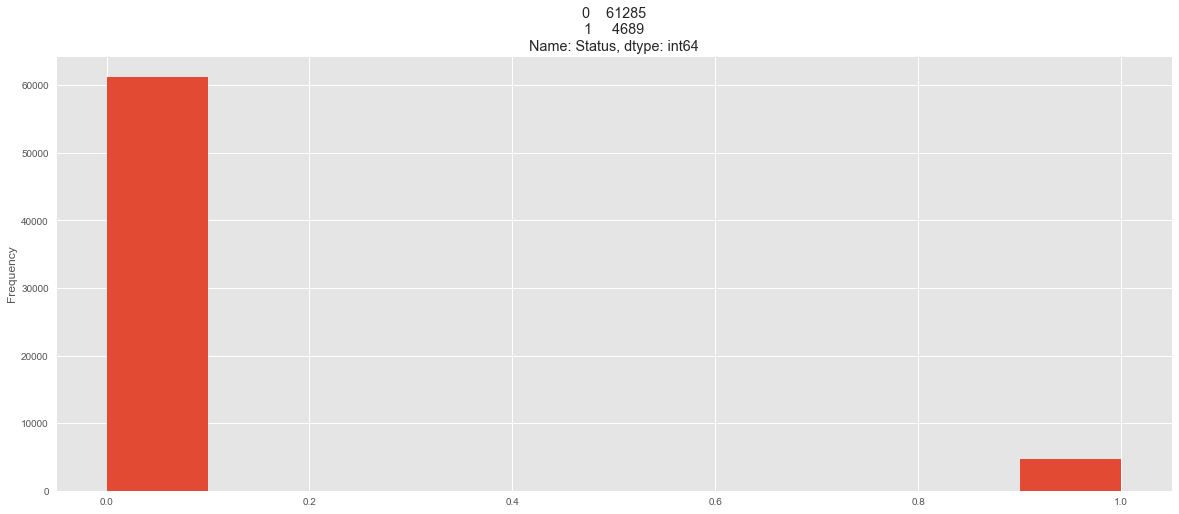

In [129]:
df['Status'].plot.hist(title=str(df['Status'].value_counts()))

Как и ожидалось, количество вернувших кредит людей значительно меньше - 7.1%. 

Проверим признаки тренировочной выборки на пропуски и типы.

In [130]:
pd.DataFrame({'Missing values count': df.isnull().sum(), 'Type': df.dtypes})

,Missing values count,Type
par1,0,int64
par2,0,float64
par3,0,int64
par4,0,int64
par5,0,int64
par6,0,float64
par7,0,float64
par8,0,int64
par9,0,float64
par10,0,float64


## Data Preparation 

Стандартизируем численные факторы. 

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
buf_df = df[['Status', 'par53', 'par61', 'par71', 'par60', 'par68', 'par200']] # object, binary type columns
df = df.drop(columns=['Status', 'par53', 'par61', 'par71', 'par60', 'par68', 'par200'])
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df = pd.concat([buf_df, df], axis=1)
df.head()

,Status,par53,par61,par71,par60,par68,par200,par1,par2,par3,...,par214,par215,par216,par217,par218,par219,par220,par221,par222,par223
0,0,Chrome,mail.ua,moneyveo.ua,True,False,True,-0.582314,0.018460,0.243327,...,-0.226385,0.143240,0.188832,-0.925916,-0.265621,-0.804948,-0.343537,-0.320241,-0.807088,0.384497
1,0,Opera,bigmir.net,google.com.ua,True,False,True,-0.582314,0.001988,-0.198212,...,2.363419,1.882807,-0.274922,-0.925916,-0.265621,-0.804948,-0.343537,0.209314,-0.437233,-0.247256
2,0,Chrome,gmail.com,googleadservices.com,True,True,True,2.985328,0.011580,0.773175,...,-0.122793,-0.201285,0.304771,0.179316,-0.217355,0.468471,0.102630,-0.320490,-0.402984,2.153405
3,0,Chrome,i.ua,googleadservices.com,True,False,True,0.131215,0.032777,0.993945,...,-0.640753,1.335310,0.130863,1.179289,-0.223388,2.221206,6.018100,0.106449,-0.397500,0.416084
4,0,Safari,mail.ru,NaN,True,False,True,-0.582314,0.008727,0.022558,...,2.156235,1.696425,-0.274922,-0.925916,-0.265621,-0.804948,-0.343537,-0.212632,-0.534191,0.005445


Бинарно кодируем булевые переменные.

In [132]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df['par60'] = lb.fit_transform(df['par60'])
df['par68'] = lb.fit_transform(df['par68'])
df['par200'] = lb.fit_transform(df['par200'])
df.head()

,Status,par53,par61,par71,par60,par68,par200,par1,par2,par3,...,par214,par215,par216,par217,par218,par219,par220,par221,par222,par223
0,0,Chrome,mail.ua,moneyveo.ua,1,0,1,-0.582314,0.018460,0.243327,...,-0.226385,0.143240,0.188832,-0.925916,-0.265621,-0.804948,-0.343537,-0.320241,-0.807088,0.384497
1,0,Opera,bigmir.net,google.com.ua,1,0,1,-0.582314,0.001988,-0.198212,...,2.363419,1.882807,-0.274922,-0.925916,-0.265621,-0.804948,-0.343537,0.209314,-0.437233,-0.247256
2,0,Chrome,gmail.com,googleadservices.com,1,1,1,2.985328,0.011580,0.773175,...,-0.122793,-0.201285,0.304771,0.179316,-0.217355,0.468471,0.102630,-0.320490,-0.402984,2.153405
3,0,Chrome,i.ua,googleadservices.com,1,0,1,0.131215,0.032777,0.993945,...,-0.640753,1.335310,0.130863,1.179289,-0.223388,2.221206,6.018100,0.106449,-0.397500,0.416084
4,0,Safari,mail.ru,NaN,1,0,1,-0.582314,0.008727,0.022558,...,2.156235,1.696425,-0.274922,-0.925916,-0.265621,-0.804948,-0.343537,-0.212632,-0.534191,0.005445


One-hot кодируем строковые категориальные признаки par53, par61, par71. Созданную колонку par71_Else, для пропущенных значений в par71 сразу удаляем за неинформативностью. Таким образом мы извлечем максимум информации из имеющихся значений этого признака.

In [133]:
df = pd.get_dummies(df, columns=['par53', 'par61', 'par71'])
df = df.drop(columns=['par71_Else'])
df.head()

,Status,par60,par68,par200,par1,par2,par3,par4,par5,par6,...,par71_promo.moneyveo.ua,par71_rdr.salesdoubler.com.ua,par71_search.ukr.net,par71_vk.com,par71_vzjat-kredit-nalichnymi.blogspot.com,par71_yabs.yandex.ru,par71_yabs.yandex.ua,par71_yandex.ru,par71_yandex.ua,par71_zajmonline.com.ua
0,0,1,0,1,-0.582314,0.018460,0.243327,-0.249913,-0.379194,-0.948842,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,-0.582314,0.001988,-0.198212,-0.249913,-0.060299,0.395572,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,2.985328,0.011580,0.773175,0.332359,0.462318,-0.386569,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0.131215,0.032777,0.993945,-0.104345,1.009523,-0.320700,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,-0.582314,0.008727,0.022558,-0.177129,0.491342,-0.222402,...,0,0,0,0,0,0,0,0,0,0


## Visualization (PCA)  

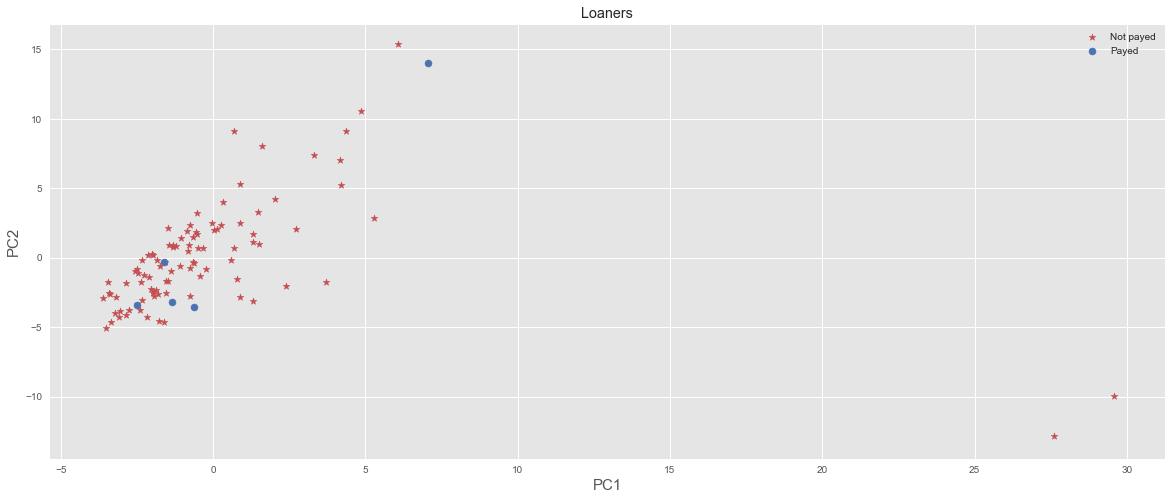

In [134]:
from sklearn.decomposition import PCA


def show_df(df):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)

    for i in range(0, pca_2d.shape[0]):
        if df.iloc[i]['Status'] == 0:
            c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='*')
        else:
            c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='o')

    plt.legend([c1, c2], ['Not payed', 'Payed'])
    plt.xlabel('PC1', fontsize = 15)
    plt.ylabel('PC2', fontsize = 15)
    plt.title('Loaners')
    plt.show()
    
show_df(df.sample(n=100)) # just for test

### Outliers detection 

Для определения аномальных наблюдений используем алгоритм базиующийся на деревьях решений. 
Проводя разделения выборки по рандомным фичам и рандомным порогам для них, обнаруживаются аномалии в данных.

In [135]:
from sklearn.ensemble import IsolationForest


X, y = df.loc[:, df.columns !='Status'], df['Status']

if_clf = IsolationForest(n_estimators=10, random_state=42)
if_clf.fit(X, y)
y_pred = if_clf.predict(X)
observations = {val: np.sum(y_pred == val) for val in np.unique(y_pred)}
observations

{-1: 6598, 1: 59376}

In [136]:
print('Outlier/ALL: {0}%'.format(round(observations[-1] / (observations[-1] + observations[1]), 3) * 100))

Outlier/ALL: 10.0%


Удалим наблюдения определенные аномальными (-1).

In [137]:
del_indexes = [i for i in range(len(y_pred)) if y_pred[i] == -1]

df = df.drop(df.index[del_indexes])
df.shape

(59376, 295)

In [138]:
print('Positive/ALL: {0}%'.format(round(df['Status'].sum() / df.shape[0], 3) * 100))

Positive/ALL: 6.9%


К сожалению, в ходе удаления аномалий мы еще больше сократили и без того отстающий объем положительных результатов по выборке. Относительный показатель присутствия положительных наблюдений снизился с 7.1% до 6.9%. 

## Feature Selection 

Применим разные техники отбора признаков для сравнения: показатели корреляции и прирост информации на основе DecisionTrees. 

### VarianceThreshold 

Определим факторы с низкой вариативностью. Признаки с вариацией < 0.1 отсеиваем. 

In [139]:
from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=(0.1))
data = sel.fit_transform(df.loc[:, df.columns !='Status'])
df_status = df['Status']

cols = list(df.columns)
cols.remove('Status')
support = sel.get_support()
del_indexes = [i for i in range(len(support)) if not support[i]]
vt_cols = [v for i, v in enumerate(cols) if i not in del_indexes]  

df_status = df_status.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.DataFrame(data, columns=vt_cols)
df = pd.concat([df_status, df], axis=1)

### Correlation 

#### In pairs 

Удалим высококоррелированые признаки дабы избежать проблемы мультиколлинеарности. 

In [140]:
corr = df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(columns=to_drop)

df.head()

,Status,par60,par68,par200,par1,par2,par3,par4,par5,par6,...,par218,par219,par220,par221,par222,par223,par53_Chrome,par61_gmail.com,par61_mail.ru,par71_google.com.ua
0,0,1.0,0.0,1.0,-0.582314,0.018460,0.243327,-0.249913,-0.379194,-0.948842,...,-0.265621,-0.804948,-0.343537,-0.320241,-0.807088,0.384497,1.0,0.0,0.0,0.0
1,0,1.0,0.0,1.0,-0.582314,0.001988,-0.198212,-0.249913,-0.060299,0.395572,...,-0.265621,-0.804948,-0.343537,0.209314,-0.437233,-0.247256,0.0,0.0,0.0,1.0
2,0,1.0,1.0,1.0,2.985328,0.011580,0.773175,0.332359,0.462318,-0.386569,...,-0.217355,0.468471,0.102630,-0.320490,-0.402984,2.153405,1.0,1.0,0.0,0.0
3,0,1.0,0.0,1.0,0.131215,0.032777,0.993945,-0.104345,1.009523,-0.320700,...,-0.223388,2.221206,6.018100,0.106449,-0.397500,0.416084,1.0,0.0,0.0,0.0
4,0,1.0,0.0,1.0,-0.582314,0.008727,0.022558,-0.177129,0.491342,-0.222402,...,-0.265621,-0.804948,-0.343537,-0.212632,-0.534191,0.005445,0.0,0.0,1.0,0.0


#### with Status 

Рассмотрим распределение факторов в зависимости от их абсолютной корреляции с переменной Status. 
В качестве визуализации используем перцентитли и график распределения.

0.1    0.003744
0.2    0.009204
0.3    0.013125
0.4    0.021492
0.5    0.031072
0.6    0.038435
0.7    0.050158
0.8    0.058735
0.9    0.077561
Name: Status, dtype: float64


c:\users\anton\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


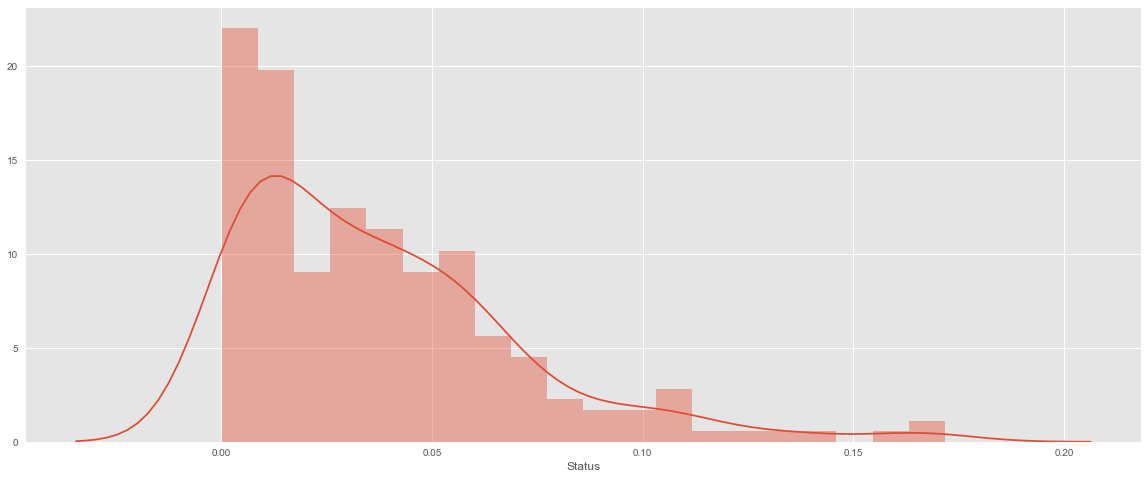

In [141]:
status_corr = df.corr()['Status'].abs()
status_corr = status_corr.drop('Status')
print(status_corr.quantile(np.linspace(0.1, 1, 9, 0)))
sns.distplot(status_corr, bins=20)

На основе полученной инфографики мы сможем делать заключения об оптимальном пороге отсечения фич по корреляции с Status.

Для начала, в качестве порога отсечения выберем 0.01. 

In [142]:
corr_cols_del = status_corr[status_corr < 0.01].keys()
print(corr_cols_del)

Index(['par2', 'par3', 'par7', 'par8', 'par9', 'par10', 'par11', 'par12',
       'par14', 'par16', 'par17', 'par18', 'par19', 'par22', 'par26', 'par27',
       'par28', 'par30', 'par31', 'par33', 'par34', 'par35', 'par36', 'par37',
       'par41', 'par44', 'par45', 'par46', 'par50', 'par59', 'par78', 'par92',
       'par113', 'par122', 'par126', 'par127', 'par134', 'par140', 'par146',
       'par148', 'par204', 'par209', 'par211', 'par220', 'par222'],
      dtype='object')


In [143]:
df = df.drop(columns=corr_cols_del)
df.shape

(59376, 162)

### Feature Importance 

Оценив корреляции, также, воспользуемся деревьями решения, для определения наиболее информативных факторов.

In [144]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(df.loc[:, df.columns != 'Status'], df['Status'])

features = list(df.columns)
features.remove('Status')
feature_rank = pd.DataFrame({
    'Feature': features, 
    'Importance': etc.feature_importances_}).sort_values(by=['Importance'], ascending=False)

Теперь мы можем по показателю information gain отфильтровать 50 наиболее информативных факторов.

In [145]:
etc_cols = feature_rank[0:50]['Feature'] # top 50
print(etc_cols) 

20            par48
65           par108
21            par49
66           par109
141          par203
2            par200
132          par192
23            par52
8             par15
133          par193
49            par89
103          par156
33            par70
130          par190
147          par212
34            par72
102          par155
43            par82
17            par42
157    par53_Chrome
140          par202
153          par218
137          par198
32            par69
12            par29
59           par101
155          par221
35            par73
6              par6
129          par189
78           par123
41            par80
156          par223
25            par55
26            par56
30            par65
13            par32
24            par54
148          par213
149          par214
27            par57
37            par75
3              par1
138          par199
96           par145
139          par201
117          par174
154          par219
28            par63
48            par87


In [146]:
df = df[['Status'] + list(etc_cols)]
df.shape

(59376, 51)

Таким образом используя последовательно фильтрофание по вариативности признака, по корреляции с целевой переменной и по информационной значимости, мы отобрали 50 лучших признаков для загрузки в модели.
На этом фильтрация не заканчивается - при обучении логистической регрессии продемонстрируем метод Recursive Feature Elimition (RFC) подборки наилучшего подмножества фич для алгоритма.

## Sampling 

Количество вернувших кредит людей составляет лишь 6.9%. Для того чтобы выборка была репрезентативной, а модель, соответственно, качественной, нам нужно неким образом сбалансировать сэмпл. 
Простейшими методами являются так называемые oversampling и undersampling, то есть искусственное увеличение или уменьшение присутствия объектов соответствующего класса с целью выровнять их количество. Также, существуют более сложные техники балансировки, основанные на "взвешивании" классов. Рассмотрим детальнее упомянутые методы.

Есть несколько стратегий наполнения недостающего класса объектами: клонирование, клонирование с частичной модификацией, "скрещивание" наблюдений. 

Тогда как Undersampling состоит в том чтобы без потери информативности урезать представительство мажорного класса в выборке.
В таком случае стоит провести предварительный кластерный анализ в рамках доминирующего класса, и разбить его на наиболее отличающиеся группы. Получив эти группы, выберем из них пропорциональное их объему число объектов так, чтобы получить нужное нам количество наблюдений данного класса.

В данном случае, на мой взгляд, наиболее целесообразной техникой будет Undersampling класса не вернувших кредит заемщиков.

Сперва, разделим выборку на положительный и негативный классы.

In [147]:
df_pos, df_neg = df[df['Status'] == 1], df[df['Status'] == 0] 

### DBSCAN - (Density-Based Spatial Clustering of Applications with Noise) 

C помощью алгоритма DBSCAN кластеризуем df_neg на произвольное количество групп. Таким образом нам не нужно будет угадывать количество кластеров на данных сложной структуры.

In [106]:
# from sklearn.cluster import DBSCAN


# dbscan = DBSCAN(eps=0.05, min_samples=500)
# dbscan.fit(df_neg)
# df_neg['Cluster'] = dbscan.labels_
# df_neg['Cluster'].value_counts()

### K-means

В качестве более производительной альтернативы можно использовать k-means c 10 кластерами.

In [148]:
from sklearn.cluster import KMeans


k_means = KMeans(n_clusters=10)
k_means.fit(df_neg) 
df_neg['Cluster'] = k_means.labels_
df_neg['Cluster'].value_counts()

c:\users\anton\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    14393
6     7874
9     7566
3     6878
2     4648
7     4641
0     4246
5     2126
8     1526
4     1383
Name: Cluster, dtype: int64

Теперь пропорционально объемам кластера и отношению численности положительного класса к отрицательному в общем, выбираем из каждого кластера рандомно нужное число объектов, так чтобы в результате + и - классы сравнялись по мощности, а выборка негативных объектов наилучшим образом характеризировала совокупность всех отрицательных результатов. Такая выборка еще называется стратифицированной.  

In [149]:
df_neg_next = df_neg.iloc[0:0]

pos_to_neg = df_pos.shape[0] / df_neg.shape[0]

for cluster, df_neg_cluster in df_neg.groupby('Cluster'):
    df_neg_next = df_neg_next.append(df_neg_cluster.sample(frac=pos_to_neg))
    
df_neg = df_neg_next.drop(columns=['Cluster'])
df_neg.shape

(4093, 51)

In [150]:
df_sample = (df_pos.append(df_neg)).sample(frac=1)
df_sample['Status'].value_counts()

1    4095
0    4093
Name: Status, dtype: int64

Итак, мы добились что в выборке кторой мы будем обучать модели поровну объектов обоих классов, а мажорирующий класс представлен в полном своем многообразии.
Также, размерность данных значительно снижена (50 фич), а количество наблюдений сокращено до ≈ 8000, это позволяет нам наконец-то, не дожидаясь визуализации часами, взглянуть на то как, собственно, выглядит обучающий датасет в PCA проекции в 2-мерное пространство.

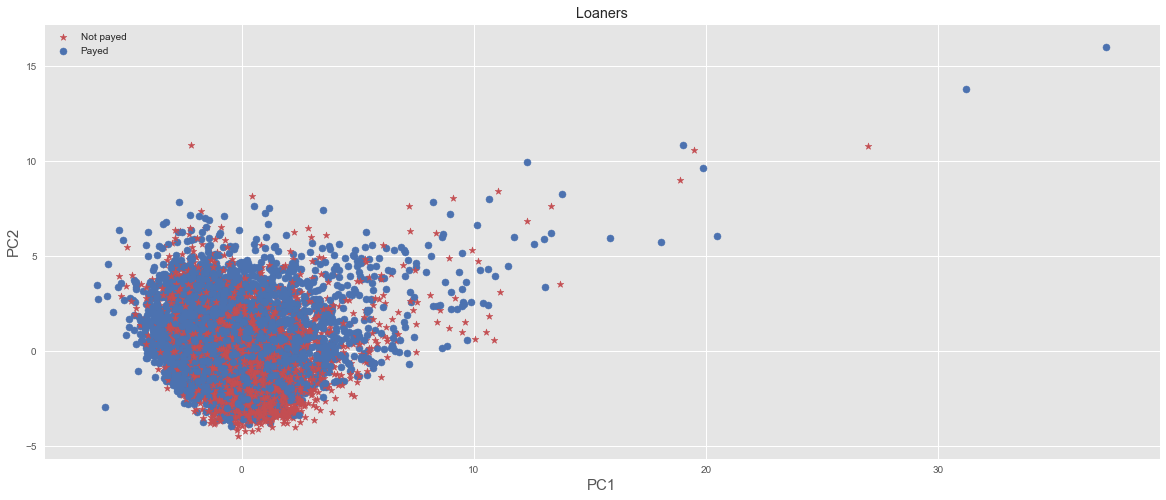

In [151]:
show_df(df_sample)

## Modelling 

### Logistic Regression 

Отберем наилучший набор 40 признаков из 50 доступных для модели лог регрессии.

In [152]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X, y = df_sample.loc[:, df_sample.columns !='Status'], df_sample['Status']

lr = LogisticRegression(penalty='l2', C=0.1)
rfe = RFE(lr, 40)
rfe = rfe.fit(X, y)

features_rank = rfe.ranking_ # 1 - best feature 
print(features_rank)

[ 1  1  1  1  1  1  1 10  1  3  1  2  1  1  1  1  1  1  1  1  6  1  1 11
  1  1  1  1  1  1  1  1  8  1  1  1  7  1  1  1  9  1  1  1  1  1  1  4
  5  1]


Обучим классификатор на лучшем подмножестве признаков.

In [153]:
lr_features = [df_sample.columns[i] for i in range(len(features_rank)) if features_rank[i] == 1]
df_lr = df_sample[list(lr_features)]

X_lr, y_lr = df_lr.loc[:, df_lr.columns !='Status'], df_lr['Status']


lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_lr, y_lr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Посчитаем оценки кросс-валидации.

In [154]:
from sklearn.model_selection import cross_val_score


cvs = cross_val_score(lr, X, y, cv=8)
np.round(cvs, decimals=2)

array([0.75, 0.76, 0.76, 0.75, 0.76, 0.78, 0.75, 0.75])

Проверим модель на всех данных находящихся в Train_Sample.csv, а не подготовленной для обучения выборке.

In [155]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(df[lr_features].drop('Status', axis=1))

np.round(accuracy_score(df['Status'], y_pred), decimals=2)

0.75

Итак, качество модели лог регрессии варьируется между 0.75 и 0.78, как для обучающей выборки, так и для ген. совокупности. Стоит заметить что определение термина Генеральная Совокупность не совсем соответствует тому что мы здесь под ним подразумеваем. Однако, в данном контексте, это уместно. 

### Random Forest 

In [156]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40, 
                             max_features=20, 
                             max_depth=10, 
                             n_jobs=-1,
                             random_state=0)
rfc.fit(X, y)
cvs = cross_val_score(rfc, X, y, cv=8)
np.round(cvs, decimals=2)

array([0.76, 0.75, 0.77, 0.76, 0.76, 0.79, 0.76, 0.75])

In [157]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(df.loc[:, df.columns != 'Status'])

np.round(accuracy_score(df['Status'], y_pred), decimals=2)

0.75

Ансамбль деревьев решений дает примерно те же результаты, что и лог регрессия на обоих версиях выборки. 
Совпадение качества результатов говорит о хорошей обобщающей способности df_sample, то есть подвыборки Train_Sample.

Для оценки наших моделей бинарной классификации используем классические метрики.

### Metrics

#### LogRegression 

In [158]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

def analyze_clf(clf, X_test, y_test):
    y_score = clf.predict_proba(X_test)[:,1]
    
    def show_cm():
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
    
    def show_clf_report():
        print(classification_report(y_test, y_pred))
        
    def show_roc():
        plt.figure()
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=str(clf))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUC ROC Score: ' + str(roc_auc_score(y_test, y_score)))
        plt.legend(loc="lower right")
        plt.show()
        
    show_cm()
    show_clf_report()
    show_roc()

Сравним наши классификаторы.

             precision    recall  f1-score   support

          0       0.99      0.74      0.85     55281
          1       0.21      0.95      0.35      4095

avg / total       0.94      0.75      0.81     59376



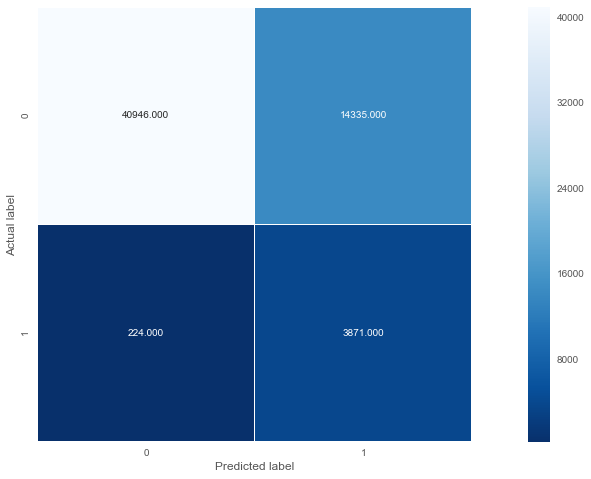

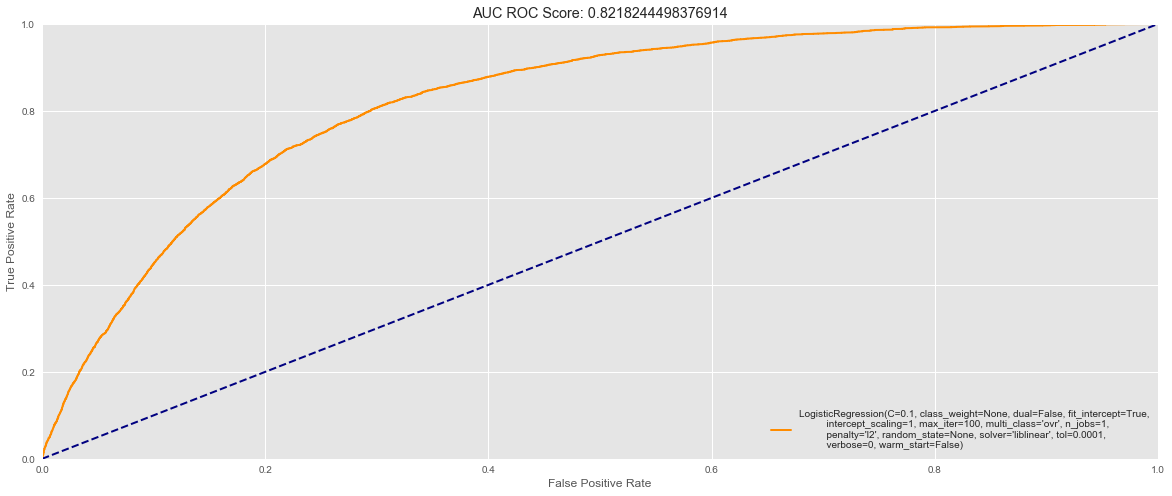

In [159]:
analyze_clf(lr, df[lr_features].drop('Status', axis=1), df['Status'])

#### Random Forest 

             precision    recall  f1-score   support

          0       0.99      0.74      0.85     55281
          1       0.21      0.95      0.35      4095

avg / total       0.94      0.75      0.81     59376



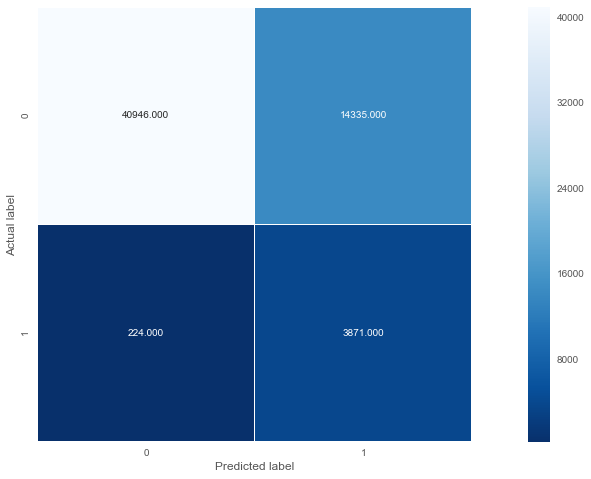

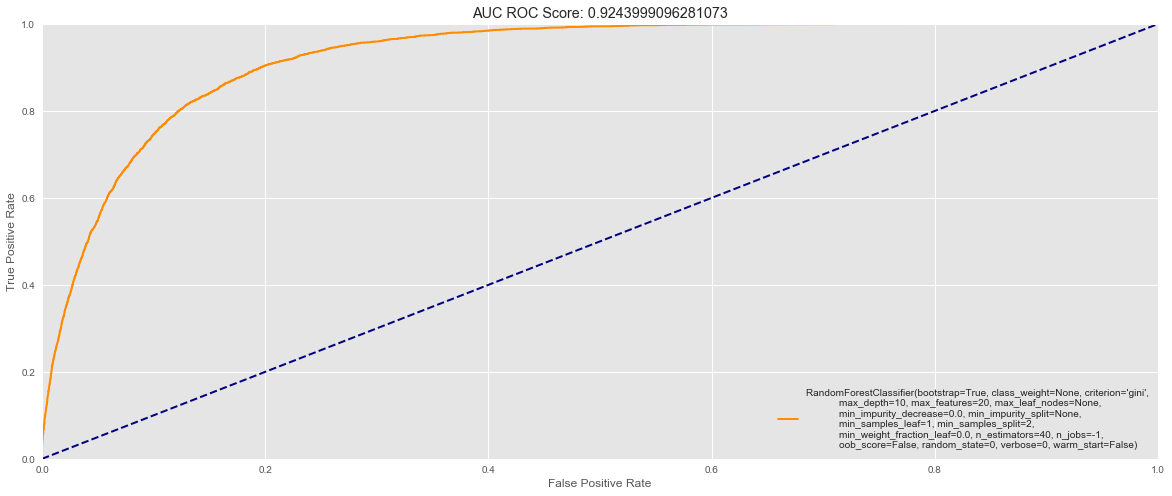

In [160]:
analyze_clf(rfc, df.loc[:, df.columns != 'Status'], df['Status'])

Наблюдаем хорошую полноту определния обоих классов, но слабую точность определения класса вернувших займ для всех классификаторов. Впрочем, это объясняется "природной" несбалансированностью данных: займы возвращают значительно реже. 

При прочих равных именно RandomForest показал себя лучше других. Используем его для прогнозирования Test_Sample.csv.

## Data Prediction 

Загрузим, и подготовим тестовые данные. Описания указвать не будем поскольку все процедуры аналогичны тем что проводились для тренировочного датасета. 

### Test Data Preparation

In [161]:
df = pd.read_csv('Test_Sample.csv', delimiter=';')
print('Test data shape: ', df.shape)

Test data shape:  (41907, 222)


In [162]:
df = df.drop(columns=['Id'])
df.head()

,par1,par2,par3,par4,par5,par6,par7,par8,par9,par10,...,par214,par215,par216,par217,par218,par219,par220,par221,par222,par223
0,12,1.375000,11,0,18006,26700.750000,1.500000,37459,5.000000,1.250000,...,10,20.000000,2,0,0,0.000000,0,3419,18479.25000,58
1,9,1.000000,14,3,3,5903.166667,0.833333,18831,1.833333,6.272727,...,3,4.500000,2,1000,5,391.625000,3133,2396,12262.78571,51
2,17,0.029412,1,44,5747,10919.500000,0.500000,37616,2.250000,3.714286,...,20,27.666667,6,0,0,0.000000,0,77,16017.88571,68
3,9,0.333333,3,0,7316,14773.666670,1.000000,24001,4.500000,1.000000,...,21,24.833333,24,1200,30,1003.333333,9030,1685,44265.36364,24
4,12,0.000000,0,0,6264,19271.500000,1.000000,58917,2.800000,4.600000,...,15,15.000000,1,2000,11,1308.500000,15702,2373,22425.25000,27


In [163]:
pd.DataFrame({'Missing values count': df.isnull().sum(), 'Type': df.dtypes})

,Missing values count,Type
par1,0,int64
par2,0,float64
par3,0,int64
par4,0,int64
par5,0,int64
par6,0,float64
par7,0,float64
par8,0,int64
par9,0,float64
par10,0,float64


In [164]:
from sklearn.preprocessing import StandardScaler

buf_df = df[['par53', 'par61', 'par71', 'par60', 'par68', 'par200']] # object, binary type columns
df = df.drop(columns=['par53', 'par61', 'par71', 'par60', 'par68', 'par200'])
df = pd.DataFrame(scaler.transform(df), columns=df.columns) # don't need to retrain

df = pd.concat([buf_df, df], axis=1)
df.head()

,par53,par61,par71,par60,par68,par200,par1,par2,par3,par4,...,par214,par215,par216,par217,par218,par219,par220,par221,par222,par223
0,Chrome,bk.ru,Else,True,False,True,-0.344471,0.022371,0.287481,-0.249913,...,0.291576,0.950896,-0.216953,-0.925916,-0.265621,-0.804948,-0.343537,0.427028,-0.113412,0.210765
1,Safari,gmail.com,NaN,False,True,True,-0.701235,0.016812,0.419943,-0.031561,...,-0.433569,-0.493566,-0.216953,0.126686,-0.250538,-0.080967,-0.174430,0.171614,-0.425170,0.100208
2,Chrome,mail.ru,google.com,True,False,True,0.250136,0.002424,-0.154058,2.952581,...,1.327498,1.665361,0.014924,-0.925916,-0.265621,-0.804948,-0.343537,-0.407376,-0.236851,0.368703
3,Safari,mail.ru,NaN,True,False,True,-0.701235,0.006930,-0.065750,-0.249913,...,1.431090,1.401320,1.058372,0.337207,-0.175122,1.049875,0.143868,-0.005903,1.179771,-0.326225
4,Chrome,mail.ru,google.com.ua,True,True,True,-0.344471,0.001988,-0.198212,-0.249913,...,0.809537,0.484941,-0.274922,1.179289,-0.232438,1.614024,0.503997,0.165871,0.084481,-0.278844


In [165]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df['par60'] = lb.fit_transform(df['par60'])
df['par68'] = lb.fit_transform(df['par68'])
df['par200'] = lb.fit_transform(df['par200'])
df.head()

,par53,par61,par71,par60,par68,par200,par1,par2,par3,par4,...,par214,par215,par216,par217,par218,par219,par220,par221,par222,par223
0,Chrome,bk.ru,Else,1,0,1,-0.344471,0.022371,0.287481,-0.249913,...,0.291576,0.950896,-0.216953,-0.925916,-0.265621,-0.804948,-0.343537,0.427028,-0.113412,0.210765
1,Safari,gmail.com,NaN,0,1,1,-0.701235,0.016812,0.419943,-0.031561,...,-0.433569,-0.493566,-0.216953,0.126686,-0.250538,-0.080967,-0.174430,0.171614,-0.425170,0.100208
2,Chrome,mail.ru,google.com,1,0,1,0.250136,0.002424,-0.154058,2.952581,...,1.327498,1.665361,0.014924,-0.925916,-0.265621,-0.804948,-0.343537,-0.407376,-0.236851,0.368703
3,Safari,mail.ru,NaN,1,0,1,-0.701235,0.006930,-0.065750,-0.249913,...,1.431090,1.401320,1.058372,0.337207,-0.175122,1.049875,0.143868,-0.005903,1.179771,-0.326225
4,Chrome,mail.ru,google.com.ua,1,1,1,-0.344471,0.001988,-0.198212,-0.249913,...,0.809537,0.484941,-0.274922,1.179289,-0.232438,1.614024,0.503997,0.165871,0.084481,-0.278844


In [166]:
df = pd.get_dummies(df, columns=['par53', 'par61', 'par71'])
df = df.drop(columns=['par71_Else'])
df.head()

,par60,par68,par200,par1,par2,par3,par4,par5,par6,par7,...,par71_promo.moneyveo.ua,par71_rdr.salesdoubler.com.ua,par71_search.ukr.net,par71_vk.com,par71_vzjat-kredit-nalichnymi.blogspot.com,par71_yabs.yandex.ru,par71_yabs.yandex.ua,par71_yandex.ru,par71_yandex.ua,par71_zajmonline.com.ua
0,1,0,1,-0.344471,0.022371,0.287481,-0.249913,2.718614,1.511105,0.013882,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,-0.701235,0.016812,0.419943,-0.031561,-0.609538,-0.619326,0.007828,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0.250136,0.002424,-0.154058,2.952581,0.452335,-0.105470,0.004801,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,-0.701235,0.006930,-0.065750,-0.249913,0.742391,0.289337,0.009341,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,-0.344471,0.001988,-0.198212,-0.249913,0.547911,0.750079,0.009341,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df = df[list(etc_cols)]

### Test Data Prediction 

In [168]:
y_pred_rfc = rfc.predict_proba(df.loc[:, df.columns != 'Status'])

status_pred = pd.DataFrame(y_pred_rfc, columns=['P(-)', 'P(+)'])
status_pred.head()

,P(-),P(+)
0,0.521835,0.478165
1,0.896922,0.103078
2,0.673203,0.326797
3,0.524245,0.475755
4,0.513353,0.486647


Сохраним полученные предсказания как csv-файл.

In [169]:
status_pred.to_csv('TestSampleStatus.csv', sep=';')